#Colab Specifications

In [1]:
!cat /proc/cpuinfo  # CPU information

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.172
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.34
clflush size	: 64
cache_alignment	: 64
address sizes

In [2]:
!cat /proc/meminfo  #  Memory Information

MemTotal:       13297228 kB
MemFree:         9606416 kB
MemAvailable:   12063348 kB
Buffers:           65272 kB
Cached:          2511052 kB
SwapCached:            0 kB
Active:           719744 kB
Inactive:        2753496 kB
Active(anon):        980 kB
Inactive(anon):   825560 kB
Active(file):     718764 kB
Inactive(file):  1927936 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               308 kB
Writeback:             0 kB
AnonPages:        896936 kB
Mapped:           230312 kB
Shmem:              1268 kB
KReclaimable:     103368 kB
Slab:             133836 kB
SReclaimable:     103368 kB
SUnreclaim:        30468 kB
KernelStack:        4528 kB
PageTables:        20060 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2896972 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9364 kB
VmallocChunk:          0 kB
Percpu:          

We can observe that Google colab is using Intel(R) Xeon(R) CPU @ 2.20GHz. The available RAM size is 12431000 KB which is equal to 12.431 GB.

#Environment SetUp

###Install PySpark

In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 51.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=8838dcef7735b15a8c0d3920258d4f73ea249960bd1ba510f2f8af7682d98aef
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


###Mount Google Drive and load dataset

In [4]:
# Mount google drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the dataset from drive to current environment
!unzip /content/drive/MyDrive/tim_dataset/dataverse_files.zip

Archive:  /content/drive/MyDrive/tim_dataset/dataverse_files.zip
  inflating: sms-call-internet-mi-2013-11-01.txt  
  inflating: sms-call-internet-mi-2013-11-02.txt  
  inflating: sms-call-internet-mi-2013-11-03.txt  
  inflating: sms-call-internet-mi-2013-11-04.txt  
  inflating: sms-call-internet-mi-2013-11-05.txt  
  inflating: sms-call-internet-mi-2013-11-06.txt  
  inflating: sms-call-internet-mi-2013-11-07.txt  
  inflating: sms-call-internet-mi-2013-11-08.txt  
  inflating: sms-call-internet-mi-2013-11-09.txt  
  inflating: sms-call-internet-mi-2013-11-10.txt  
  inflating: sms-call-internet-mi-2013-11-11.txt  
  inflating: sms-call-internet-mi-2013-11-12.txt  
  inflating: sms-call-internet-mi-2013-11-13.txt  
  inflating: sms-call-internet-mi-2013-11-14.txt  
  inflating: sms-call-internet-mi-2013-11-15.txt  
  inflating: sms-call-internet-mi-2013-11-16.txt  
  inflating: sms-call-internet-mi-2013-11-17.txt  
  inflating: sms-call-internet-mi-2013-11-18.txt  
  inflating: sms-

# Imports

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import time
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

#Exploratory Data Analysis

###Create SparkSession, Load data and clean data

In [7]:
spark = SparkSession.builder.master("local[*]").appName('Mobile Network Traffic Analysis').getOrCreate()
df=spark.read.option("delimiter",'\t').csv('/content/')
df.show(10)

+---+-------------+---+--------------------+-------------------+--------------------+--------------------+--------------------+
|_c0|          _c1|_c2|                 _c3|                _c4|                 _c5|                 _c6|                 _c7|
+---+-------------+---+--------------------+-------------------+--------------------+--------------------+--------------------+
|  1|1384470000000|  0|0.029087774982685617|               null|                null|                null|                null|
|  1|1384470000000| 39| 0.24283933154857673| 0.2434636010411766| 0.08073835401865896| 0.10687577828294556|   9.782105817350558|
|  1|1384470000000| 40| 0.10920185950874473|0.10920185950874473|                null|                null|                null|
|  1|1384470000000| 46|                null|               null|                null|                null|0.026137424264286602|
|  1|1384470600000| 39| 0.32241464495433614| 0.3857811284916054| 0.02730046487718618|0.02908777498268561

In [8]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)



As per the dataset description, _c0,_c1,_c7 are the columns of our interest which refer to 'squareId', 'time interval' and 'internet traffic acticity' respectively. Other columns should be removed. Also cast the last column from string to double and replace the null value with 0.   

In [9]:
df = df.select('_c0','_c1','_c7').withColumnRenamed("_c0","square_id") \
                                  .withColumnRenamed("_c1","time interval").withColumnRenamed("_c7","internet_traffic_activity")

df = df.withColumn("internet_traffic_activity",col("internet_traffic_activity").cast(DoubleType()))
df=df.na.fill(value=0,subset=["internet_traffic_activity"])

In [10]:
#all_internet_activities_pd = df.select('internet_traffic_activity').toPandas()

Due to hardware constraint, I could not plot the PDF plot for the whole population of internet_traffic_activity. Threfore, I have plotted the PDF plot for square Id 5161 which can be found below in this notebook.

###Find the square id with maximum traffic

In [11]:
df1=df.drop('time interval')
df2=df1.groupBy('square_id').sum()
df2.orderBy(df2["sum(internet_traffic_activity)"].desc()).limit(1).show()

+---------+------------------------------+
|square_id|sum(internet_traffic_activity)|
+---------+------------------------------+
|     5161|          1.2740060347295083E7|
+---------+------------------------------+



It is observed that the squareId 5161 observes the most traffic in the given 2 months. In the next step, the data for square Ids 5161, 4556 and 4159 is extracted and converted into pandas dataframe.

###Extract the data separately for each square id into pandas dataframes

In [12]:
df_5161 = df.filter(df.square_id=='5161').toPandas()
df_4556 = df.filter(df.square_id=='4556').toPandas()
df_4159 = df.filter(df.square_id=='4159').toPandas()

###Probability Density Function plots for the square Id 5161

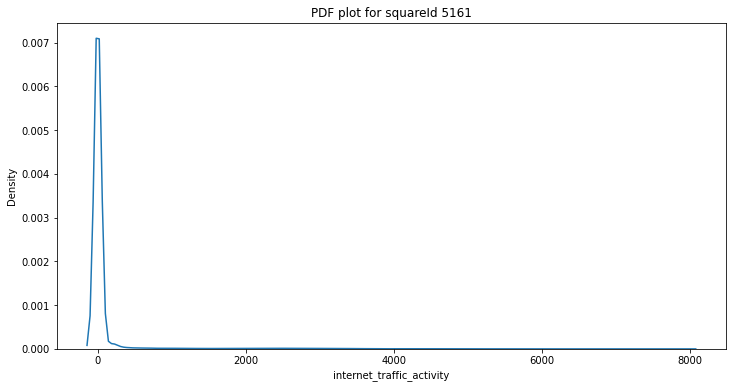

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_5161['internet_traffic_activity'])
plt.title('PDF plot for squareId 5161')
plt.show()

 The PDF plot indicates that the value for internet traffic activity in square id 5161 varies between 0 to 8000. However, probability of finding a data point in lower value range is higher than the higher ranges.


###Visualization of timeseries for square Id 4159 

In [14]:
df_4159['time interval']=pd.to_datetime(df_4159['time interval'],unit='ms')     #Convert the time interval column from string to dateTime
df_4159.set_index('time interval',inplace=True)                                 #Make the time interval as index
df_4159.head()

,square_id,internet_traffic_activity
time interval,,
2013-11-14 23:00:00,4159,0.000000
2013-11-14 23:00:00,4159,218.876133
2013-11-14 23:00:00,4159,0.006652
2013-11-14 23:00:00,4159,0.293271
2013-11-14 23:10:00,4159,0.000000


As we can observe that there are multiple values available for a given time interval. In the next step we will aggregate values group by time interval and then plot the timeseries for the squareId 4159 in the first two week interval.

Text(0.5, 1.0, 'Figure of timeseries of for squareId 4159 ')

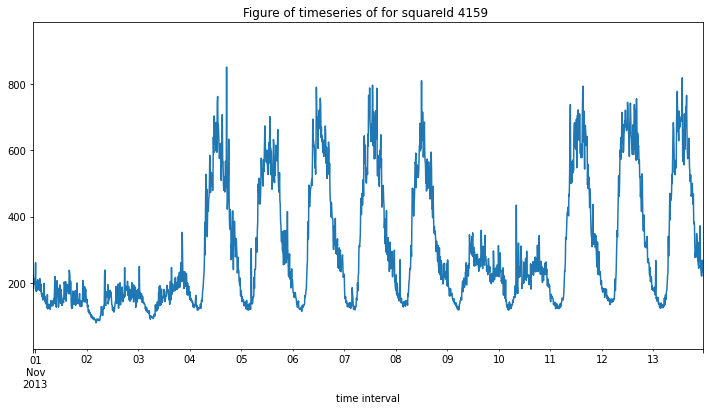

In [15]:
df_4159.drop('square_id',axis=1,inplace=True)
df_4159 = df_4159.groupby('time interval').internet_traffic_activity.agg('sum')
df_4159.plot(xlim=['2013-10-31 23:00:00','2013-11-13 23:00:00'],figsize=(12,6))
plt.title("Figure of timeseries of for squareId 4159 ")

In [16]:
 datetime(2013,11,9).weekday()

5

09 Nov 2013 was Saturday. We can observe that the weekends have huge impact on the mobile traffic in area with square id 4159.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot for the square id 4159')

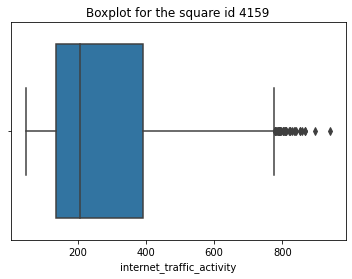

In [17]:
# Boxplot for square id 4159
sns.boxplot(df_4159)
plt.title("Boxplot for the square id 4159")

The above boxplot shows that median of the internet traffic in square id 4159 is around 200. Approximately 75% of data traffic has value less than 400. Any value above 800 can be considered as outliers.

###Visualization of timeseries for square Id 4556

Text(0.5, 1.0, 'Figure of timeseries of for squareId 4556 ')

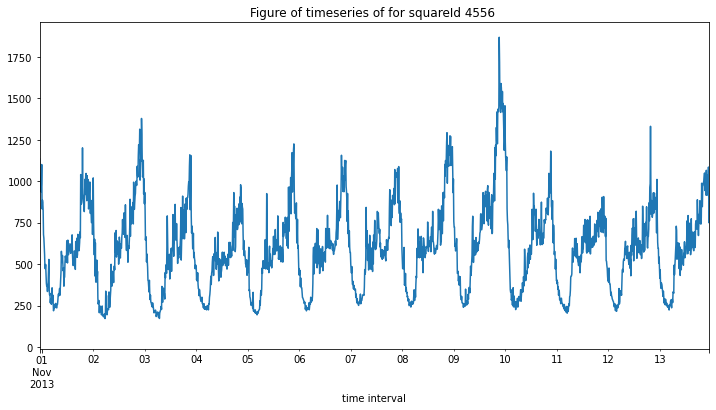

In [18]:
df_4556['time interval']=pd.to_datetime(df_4556['time interval'],unit='ms')
df_4556.set_index('time interval',inplace=True)
df_4556.drop('square_id',axis=1,inplace=True)
df_4556 = df_4556.groupby('time interval').internet_traffic_activity.agg('sum')
df_4556.plot(xlim=['2013-10-31 23:00:00','2013-11-13 23:00:00'],figsize=(12,6))
plt.title("Figure of timeseries of for squareId 4556 ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot for the square id 4556')

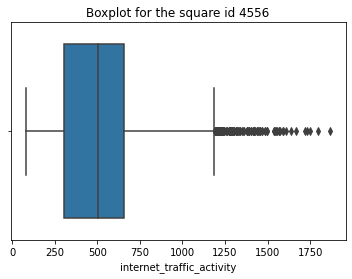

In [19]:
# Boxplot for square id 4556
sns.boxplot(df_4556)
plt.title("Boxplot for the square id 4556")

The above boxplot shows that median of the internet traffic in square id 4556 is around 500. Approximately 75% of data traffic has value less than 700. Any value above 1200 can be considered as outliers.

###Visualization of timeseries for square Id 5161

Text(0.5, 1.0, 'Figure of timeseries of for squareId 5161 ')

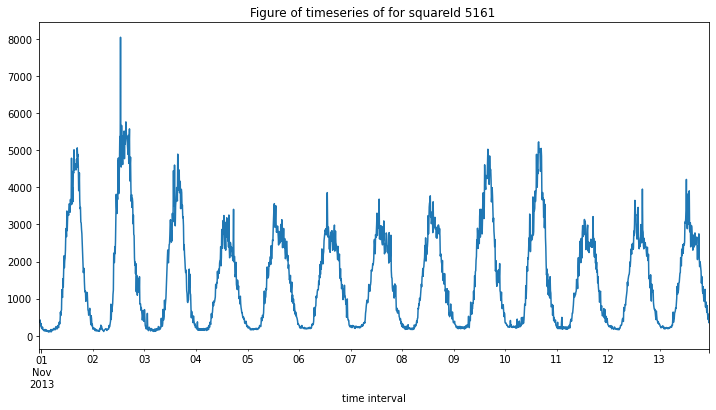

In [20]:
df_5161['time interval']=pd.to_datetime(df_5161['time interval'],unit='ms')
df_5161.set_index('time interval',inplace=True)
df_5161.drop('square_id',axis=1,inplace=True)
df_5161 = df_5161.groupby('time interval').internet_traffic_activity.agg('sum')
df_5161.plot(xlim=['2013-10-31 23:00:00','2013-11-13 23:00:00'],figsize=(12,6))
plt.title("Figure of timeseries of for squareId 5161 ")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot for the square id 5161')

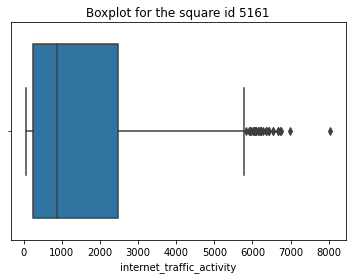

In [21]:
# Boxplot for square id 5161
sns.boxplot(df_5161)
plt.title("Boxplot for the square id 5161")

The above boxplot shows that median of the internet traffic in square id 5161 is below 1000. Approximately 75% of data traffic has value less than 2500. Any value above 6000 can be considered as outliers.

In [22]:
# resample data hourly for each square id
hourly_resampled_data_5161 = df_5161.resample('H').sum()
hourly_resampled_data_4556 = df_4556.resample('H').sum()
hourly_resampled_data_4159 = df_4159.resample('H').sum()

###Visualization of the hourly internet traffic in the three square ids during first two weeks of Nov 2013

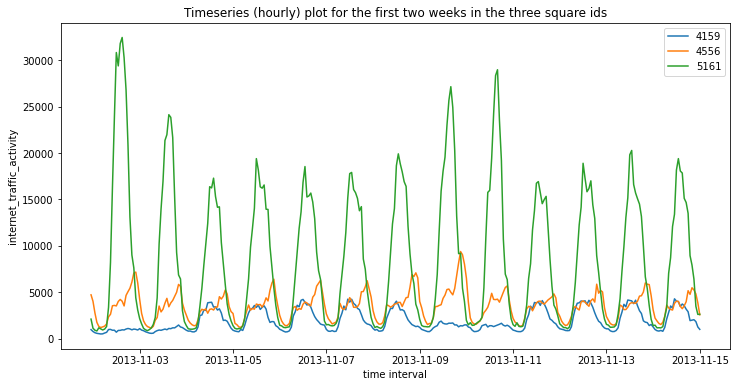

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=hourly_resampled_data_4159['2013-11-01 23:00:00':'2013-11-15 00:00:00'], ax=ax, label="4159")
sns.lineplot(data=hourly_resampled_data_4556['2013-11-01 23:00:00':'2013-11-15 00:00:00'], ax=ax, label="4556")
sns.lineplot(data=hourly_resampled_data_5161['2013-11-01 23:00:00':'2013-11-15 00:00:00'], ax=ax, label="5161")
ax.legend()
plt.title("Timeseries (hourly) plot for the first two weeks in the three square ids")
plt.show()

###Visualization of hourly internet traffic in the three square ids during 24 hours on a given date

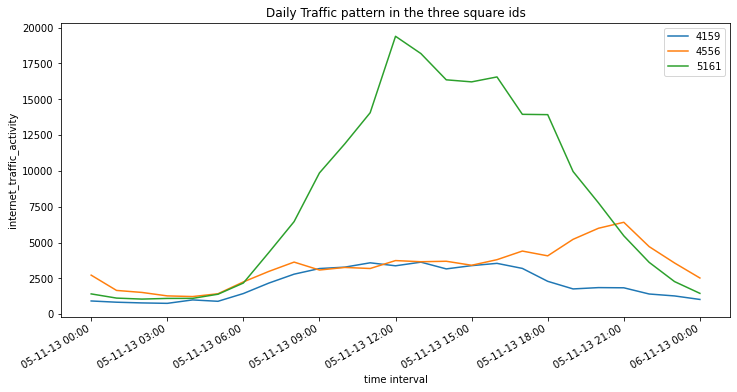

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

sns.lineplot(data=hourly_resampled_data_4159['2013-11-05 00:00:00':'2013-11-06 00:00:00'], ax=ax, label="4159")
sns.lineplot(data=hourly_resampled_data_4556['2013-11-05 00:00:00':'2013-11-06 00:00:00'], ax=ax, label="4556")
sns.lineplot(data=hourly_resampled_data_5161['2013-11-05 00:00:00':'2013-11-06 00:00:00'], ax=ax, label="5161")
ax.legend()
plt.title("Daily Traffic pattern in the three square ids")
plt.show()

For the above plot we can observe that area with square id 5161 experience very huge internet traffic as compared to other two areas. The peak traffic in square id 5161 is observed around 12:00 PM. While for area with square id 4556 the maximum traffic is observed around 9 PM. In square id 4159 internet traffic experiences not much variations during 9 AM - 5 PM. After 5 PM traffic starts to decline.

#Model Creation and Evaluation

In [25]:
def randomForestTimeseriesModel(time_seriesDF):
  #Create lag variables
  dataframe = DataFrame()
  for i in range(24, 0, -1):
    dataframe['t-' + str(i)] = time_seriesDF.internet_traffic_activity.shift(i)
  final_data = pd.concat([time_seriesDF, dataframe], axis=1)
  final_data.dropna(inplace=True)
  final_data['day_of_week']=final_data.index.weekday    #adding day of week feature can be helpful in better traffic prediction 

  # Train-Test split
  train_data = final_data[final_data.index < '2013-12-16 00:00:00']
  test_data = final_data[(final_data.index > '2013-12-15 23:00:00') & (final_data.index < '2013-12-23 00:00:00')]
  train_data_x = train_data.loc[:, train_data.columns != 'internet_traffic_activity']
  train_data_y = train_data['internet_traffic_activity']
  test_data_x  = test_data.loc[:, train_data.columns != 'internet_traffic_activity']
  test_data_y  = test_data['internet_traffic_activity']

  param_grid = {'n_estimators': [100,200,300,500],
               'max_features': ['sqrt','log2'],
               'max_depth': [2,3,4,5]}

  # Model training
  start_time_training = time.time()
  rf_reg = RandomForestRegressor()
  rf_Grid = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 4)
  rf_Grid.fit(train_data_x, train_data_y)
  end_time_training = time.time()
  training_time = end_time_training-start_time_training
  
  # Prediction
  prediction = rf_Grid.predict(test_data_x)
  # Preapare predictions as pandas dataframe with timstamp as index
  df_predicted = DataFrame()
  df_predicted['time interval'] = test_data.index
  df_predicted['prediction'] = prediction
  df_predicted.set_index('time interval',inplace=True)
  return (test_data_y,df_predicted,training_time)

###Random Forest hourly forcasting model for square id 5161

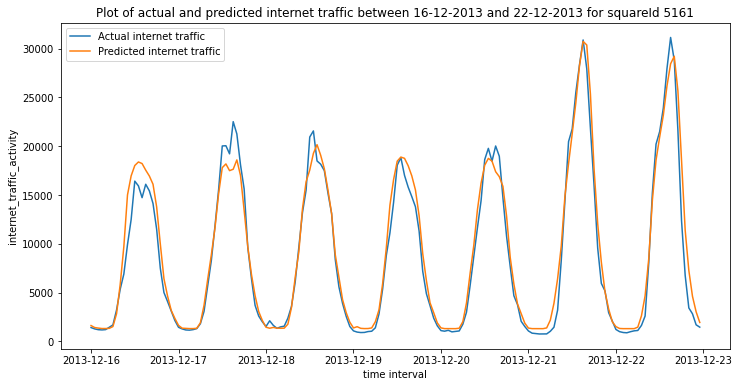

In [26]:
ex_start_5161 = time.time()
actual_5161,predicted_5161,train_time_5161 = randomForestTimeseriesModel(hourly_resampled_data_5161.to_frame())
ex_end_5161 = time.time()
execution_time_5161 = ex_end_5161 - ex_start_5161

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=actual_5161, ax=ax, label="Actual internet traffic")
sns.lineplot(data=predicted_5161['prediction'], ax=ax, label="Predicted internet traffic")
ax.legend()
plt.title("Plot of actual and predicted internet traffic between 16-12-2013 and 22-12-2013 for squareId 5161")
plt.show()

In [27]:
# Train Time : squareId 5161
print('Train time of the model for squareId 5161 : {}'.format(train_time_5161))
# Execution Time : squareId 5161
print('Execution time of the model for squareId 5161 : {}'.format(execution_time_5161))
# Mean Absolute Error
mae_5161 = mean_absolute_error(actual_5161, predicted_5161['prediction'])
print('Mean Absolute Error for square id 5161 is {}'.format(mae_5161))
# Mean Absolute Percentage Error
mape_5161 = mean_absolute_percentage_error(actual_5161, predicted_5161['prediction'])
print('Mean Absolute Percentage Error for square id 5161 is {}'.format(mape_5161))

Train time of the model for squareId 5161 : 71.72430992126465
Execution time of the model for squareId 5161 : 71.82812881469727
Mean Absolute Error for square id 5161 is 1086.9823084302761
Mean Absolute Percentage Error for square id 5161 is 0.21468957011467707


###Random Forest hourly forcasting model for square Id 4159

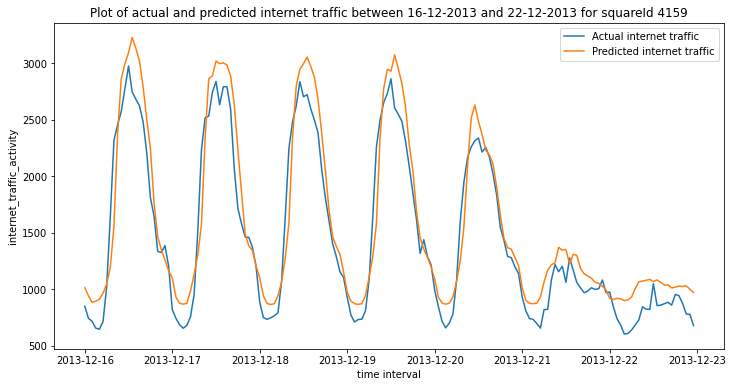

In [28]:
ex_start_4159 = time.time()
actual_4159,predicted_4159,train_time_4159 = randomForestTimeseriesModel(hourly_resampled_data_4159.to_frame())
ex_end_4159 = time.time()
execution_time_4159 = ex_end_4159 - ex_start_4159

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=actual_4159, ax=ax, label="Actual internet traffic")
sns.lineplot(data=predicted_4159['prediction'], ax=ax, label="Predicted internet traffic")
ax.legend()
plt.title("Plot of actual and predicted internet traffic between 16-12-2013 and 22-12-2013 for squareId 4159")
plt.show()

In [29]:
# Train Time : squareId 4159
print('Train time of the model for squareId 4159 : {}'.format(train_time_4159))
# Execution Time : squareId 4159
print('Execution time of the model for squareId 4159 : {}'.format(execution_time_4159))
# Mean Absolute Error
mae_4159 = mean_absolute_error(actual_4159, predicted_4159['prediction'])
print('Mean Absolute Error for square id 4159 is {}'.format(mae_4159))
# Mean Absolute Percentage Error
mape_4159 = mean_absolute_percentage_error(actual_4159, predicted_4159['prediction'])
print('Mean Absolute Percentage Error for square id 4159 is {}'.format(mape_4159))

Train time of the model for squareId 4159 : 69.63077020645142
Execution time of the model for squareId 4159 : 69.6943678855896
Mean Absolute Error for square id 4159 is 195.9805189491287
Mean Absolute Percentage Error for square id 4159 is 0.15841344628497275


###Random Forest hourly forcasting model for square id 4556

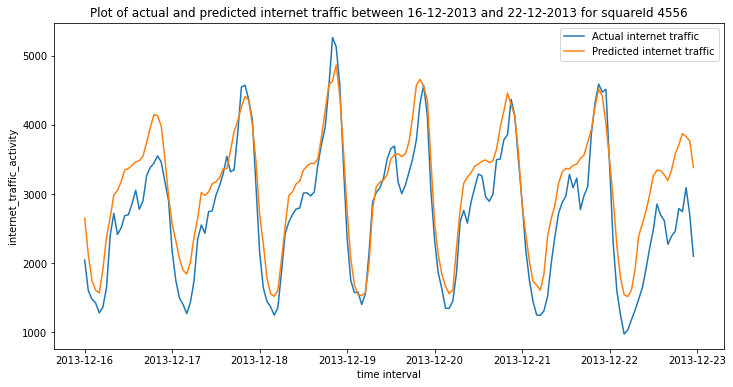

In [30]:
ex_start_4556 = time.time()
actual_4556,predicted_4556,train_time_4556 = randomForestTimeseriesModel(hourly_resampled_data_4556.to_frame())
ex_end_4556 = time.time()
execution_time_4556 = ex_end_4556 - ex_start_4556

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=actual_4556, ax=ax, label="Actual internet traffic")
sns.lineplot(data=predicted_4556['prediction'], ax=ax, label="Predicted internet traffic")
ax.legend()
plt.title("Plot of actual and predicted internet traffic between 16-12-2013 and 22-12-2013 for squareId 4556")
plt.show()

In [31]:
# Train Time : squareId 4556
print('Train time of the model for squareId 4556 : {}'.format(train_time_4556))
# Execution Time : squareId 4556
print('Execution time of the model for squareId 4556 : {}'.format(execution_time_4556))
# Mean Absolute Error
mae_4556 = mean_absolute_error(actual_4556, predicted_4556['prediction'])
print('Mean Absolute Error for square id 4556 is {}'.format(mae_4556))
# Mean Absolute Percentage Error
mape_4556 = mean_absolute_percentage_error(actual_4556, predicted_4556['prediction'])
print('Mean Absolute Percentage Error for square id 4556 is {}'.format(mape_4556))

Train time of the model for squareId 4556 : 75.51762318611145
Execution time of the model for squareId 4556 : 75.58530712127686
Mean Absolute Error for square id 4556 is 405.6694676400667
Mean Absolute Percentage Error for square id 4556 is 0.18067896429253766
